# Pandas: DataFrames

Se importa la biblioteca pandas, para disponer de todos los objetos aquí definidos:

In [114]:
import pandas as pd

# importar numpy para usarlo en los ejemplos
import numpy as np

## DataFrames

Un DataFrame es una generalización del concepto de Serie. Contiene un índice (numérico, nominal, fechas, etc.) y varias series cuyos datos se 'alinean' de acuerdo con los índices. Se puede asimilar al concepto de una tabla de varias columnas, donde los índices referencian las filas y los títulos de las columnas las series.
En el lenguaje del aprendizaje de máquina a las columnas se les denomina características (features) del dataset.

Siendo una colección de series, una primera forma de instanciar un DataFrame es a partir de varias series, por ejemplo:

In [115]:
# Se crean un par de series. Observar que no es necesario que los indices coincidan
s1 = pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd'])
s2 = pd.Series(np.random.randn(4), index=['b', 'c', 'd', 'e'])

# Se crea un diccionario con las 2 columnas (Series)
dict = { 'one': s1, 'two': s2 }

# Se crea un objeto DataFrame a partir de estos datos
df1 = pd.DataFrame(dict)
df1

,one,two
a,0.876778,NaN
b,0.684670,0.903164
c,-1.813383,-0.049287
d,-0.020350,-2.667094
e,NaN,-0.633201


Observar que a los indices no presentes en alguna de las series se les asigna el valor NaN (Not a Number)

Otra alternativa es crear el DataFrame a partir de un ndarray de numpy. En este caso los nombres de las columnas se deben especificar por medio del parametro columns. Por ejemplo:

In [116]:
df2 = pd.DataFrame( np.random.randn(7,4), columns=[ 'arbol', 'fruta', 'flor', 'raiz' ] )
df2

,arbol,fruta,flor,raiz
0,1.262666,1.011445,0.995041,1.004591
1,-1.398399,0.664749,-1.168278,-0.056880
2,0.096938,-1.039310,-1.535725,-1.313002
3,0.318741,0.147161,-0.233076,1.894338
4,-0.282391,1.727461,-0.476828,0.730641
5,-2.129097,-0.605912,-0.527529,0.506590
6,-0.830569,0.252471,-0.630406,-0.949971


Se puede crear a partir de un diccionario de listas o de ndarrays. El argumento index permite especificar los indices de la tabla.

In [117]:
dict = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
df3 = pd.DataFrame(dict, index=['qwe','rty','uio','pas'])
df3

,one,two
qwe,1,4
rty,2,3
uio,3,2
pas,4,1


o asi mismo de una lista de diccionarios. El argumento index permite especificar los indices de la tabla.

In [118]:
listdict = [ {'b':1,'c':2,'d':3}, {'a':1.1,'c':1.2,'d':1.3}, {'c':2.1,'d':2.2,'b':2.2}, {'a':0,'b':0.1,'c':0.2,'d':0.3} ]
df4 = pd.DataFrame(listdict, index=['2017-10-01','2017-11-01','2017-12-01','2018-01-01'])
df4

,a,b,c,d
2017-10-01,NaN,1.0,2.0,3.0
2017-11-01,1.1,NaN,1.2,1.3
2017-12-01,NaN,2.2,2.1,2.2
2018-01-01,0.0,0.1,0.2,0.3


Observar en el ejemplo anterior como los datos se alinean por los nombres de las columnas.

## Atributos de los DataFrames

In [119]:
# Tipo de dato de cada columna
df4.dtypes

a    float64
b    float64
c    float64
d    float64
dtype: object

In [120]:
# Los valores del dataframe. Observar que retorna un ndarray
df3.values

array([[ 1.,  4.],
       [ 2.,  3.],
       [ 3.,  2.],
       [ 4.,  1.]])

In [121]:
# Nombres de las columnas
df4.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [122]:
# Indices de la tabla
df4.index

Index(['2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01'], dtype='object')

In [123]:
# Esta vacia la estructura?
df4.empty

False

In [155]:
# Obtener el tamaño del DataFrame
df4.size

16

In [156]:
# Obtener la forma del DataFrame
df4.shape

(4, 4)

## Acceso a los elementos de un DataFrame

Se puede utilizar el método .get o la notación de indices, por ejemplo:

In [124]:
df3.get('one')

qwe    1
rty    2
uio    3
pas    4
Name: one, dtype: float64

In [125]:
df3['one']

qwe    1
rty    2
uio    3
pas    4
Name: one, dtype: float64

Se puede recuperar un subconjunto de columnas

In [126]:
df4[ ['b','c'] ]

,b,c
2017-10-01,1.0,2.0
2017-11-01,NaN,1.2
2017-12-01,2.2,2.1
2018-01-01,0.1,0.2


Recuperar un subconjunto de filas (indices)

In [127]:
df4.loc[ ['2017-12-01', '2017-10-01'], :]

,a,b,c,d
2017-12-01,NaN,2.2,2.1,2.2
2017-10-01,NaN,1.0,2.0,3.0


O que tal un subconjunto de filas y de columnas

In [128]:
df4.loc[ ['2017-12-01', '2017-10-01'], ['d','b'] ]

,d,b
2017-12-01,2.2,2.2
2017-10-01,3.0,1.0


Tambien es posible referenciar los elementos del DataFrame por el numero de fila y columna que les corresponde

In [129]:
df4.iloc[0,0], df4.iloc[2,3]

(nan, 2.2000000000000002)

Por rangos de numeros de filas o de columnas

In [130]:
df2.iloc[5:,:]

,arbol,fruta,flor,raiz
5,-2.129097,-0.605912,-0.527529,0.506590
6,-0.830569,0.252471,-0.630406,-0.949971


In [131]:
df2.iloc[3:,:2]

,arbol,fruta
3,0.318741,0.147161
4,-0.282391,1.727461
5,-2.129097,-0.605912
6,-0.830569,0.252471


In [132]:
df2.iloc[4:6, 1:2]

,fruta
4,1.727461
5,-0.605912


Para asignar valores a una celda del dataframe, se puede utilizar .at con los nombres de indices y columnas, o .iat con las posiciones numericas correspondientes

In [133]:
df2.at[4,'fruta'] = 555
df2.iat[4,0] = 666
df2.loc[4,:]

arbol    666.000000
fruta    555.000000
flor      -0.476828
raiz       0.730641
Name: 4, dtype: float64

Hacer una copia de un DataFrame

In [134]:
df5 = df4.copy()
df5

,a,b,c,d
2017-10-01,NaN,1.0,2.0,3.0
2017-11-01,1.1,NaN,1.2,1.3
2017-12-01,NaN,2.2,2.1,2.2
2018-01-01,0.0,0.1,0.2,0.3


Reemplazar los NaN por un valor deseado. El parametro inplace=True hace que se modifique el dataframe, en lugar de devolver una copia con los cambios. 

In [135]:
df5.fillna(value=-999, inplace=True)
df5

,a,b,c,d
2017-10-01,-999.0,1.0,2.0,3.0
2017-11-01,1.1,-999.0,1.2,1.3
2017-12-01,-999.0,2.2,2.1,2.2
2018-01-01,0.0,0.1,0.2,0.3


Otra alternativa para manejar la presencia de NaNs es suprir las filas,columnas donde aparezcan

In [160]:
df5 = df4.copy()
df5.dropna(inplace=True)
df5

,a,b,c,d
2017-10-01,0.0,1.0,2.0,3.0
2017-11-01,1.1,0.0,1.2,1.3
2017-12-01,0.0,2.2,2.1,2.2
2018-01-01,0.0,0.1,0.2,0.3


Para eliminar algunas filas del DataFrame se utiliza el método .drop

In [194]:
df5.drop(['2017-12-01', '2017-11-01'])

,a,b,c,d
2017-10-01,0,1.0,2.0,3.0
2018-01-01,0,0.1,0.2,0.3


Observar en el ejemplo anterior que toda fila o toda columna que contenga un NaN es eliminada.

Se pueden recuperar los elementos del comienzo o del final del DataFrame

In [159]:
df4.head(2)

,a,b,c,d
2017-10-01,0.0,1,2.0,3.0
2017-11-01,1.1,0,1.2,1.3


In [161]:
df4.tail(3)

,a,b,c,d
2017-11-01,1.1,0.0,1.2,1.3
2017-12-01,0.0,2.2,2.1,2.2
2018-01-01,0.0,0.1,0.2,0.3


## Indexado lógico

En forma similar a como lo permiten las series es posible indexar los elementos de un DataFrame usando condiciones lógicas. Por ejemplo:

In [145]:
df4[ df4>2 ]

,a,b,c,d
2017-10-01,NaN,NaN,NaN,3.0
2017-11-01,NaN,NaN,NaN,NaN
2017-12-01,NaN,2.2,2.1,2.2
2018-01-01,NaN,NaN,NaN,NaN


In [146]:
df4.isnull()

,a,b,c,d
2017-10-01,False,False,False,False
2017-11-01,False,False,False,False
2017-12-01,False,False,False,False
2018-01-01,False,False,False,False


In [147]:
# Otra forma de hacer el .fillna
df4[ df4.isnull() ] = 0
df4

,a,b,c,d
2017-10-01,0.0,1.0,2.0,3.0
2017-11-01,1.1,0.0,1.2,1.3
2017-12-01,0.0,2.2,2.1,2.2
2018-01-01,0.0,0.1,0.2,0.3


In [151]:
# .all aplica la condicion booleana a todos los elementos de cada columna
(df4>0).all()

a    False
b    False
c     True
d     True
dtype: bool

In [154]:
# .any comprueba la condicion boolean si al menos un elemento de cada serie la cumple
(df4==0).any()

a     True
b     True
c    False
d    False
dtype: bool

## Operaciones aritméticas

Para DataFrames cuyos elementos son numéricos, se dispone de todos los metodos para realizar las operaciones aritmeticas estandar: .add .sub .mul .div .pow .mod .abs .dot . Asi mismo, se pueden utilizar los operadores sobrecargados: + - * / **

In [168]:
df5**2 - df4/2

,a,b,c,d
2017-10-01,0.00,0.50,3.00,7.50
2017-11-01,0.66,0.00,0.84,1.04
2017-12-01,0.00,3.74,3.36,3.74
2018-01-01,0.00,-0.04,-0.06,-0.06


## Operadores relacionales

Los operadores relacionales se encuentran disponibles como métodos o a través de los operadores sobrecargados. Los métodos son .eq .ne .ge .gt .le .lt y sus correspondientes operadores == != >= > <= <

In [166]:
df4<=df5**2

,a,b,c,d
2017-10-01,True,True,True,True
2017-11-01,True,True,True,True
2017-12-01,True,True,True,True
2018-01-01,True,False,False,False


## Operaciones estadísticas

Las operaciones estadísticas con un DataFrame son: .describe .count .mix .max .mean .median .mode .var .std .cov .corr .sem

In [172]:
df4.describe()

,a,b,c,d
count,4.000,4.000000,4.000000,4.000000
mean,0.275,0.825000,1.375000,1.700000
std,0.550,1.021029,0.880814,1.163329
min,0.000,0.000000,0.200000,0.300000
25%,0.000,0.075000,0.950000,1.050000
50%,0.000,0.550000,1.600000,1.750000
75%,0.275,1.300000,2.025000,2.400000
max,1.100,2.200000,2.100000,3.000000


In [173]:
df4.mean()

a    0.275
b    0.825
c    1.375
d    1.700
dtype: float64

In [176]:
df4.var()

a    0.302500
b    1.042500
c    0.775833
d    1.353333
dtype: float64

In [177]:
df4.cov()

,a,b,c,d
a,0.302500,-0.302500,-0.064167,-0.146667
b,-0.302500,1.042500,0.700833,0.753333
c,-0.064167,0.700833,0.775833,0.963333
d,-0.146667,0.753333,0.963333,1.353333


Notar que efectivamente la diagonal de la matriz de covarianza son las varianzas

## Operaciones de entrada/salida

Salvar, recupear un DataFrame desde un archivo separado por comas

In [183]:
df4.to_csv('Dataframe4.csv')
df6 = pd.read_csv('Dataframe4.csv', index_col=0)
df6

,a,b,c,d
2017-10-01,0.0,1.0,2.0,3.0
2017-11-01,1.1,0.0,1.2,1.3
2017-12-01,0.0,2.2,2.1,2.2
2018-01-01,0.0,0.1,0.2,0.3


Se puede obtener la grafica de las series que componen el DataFrame en MatPlotLib

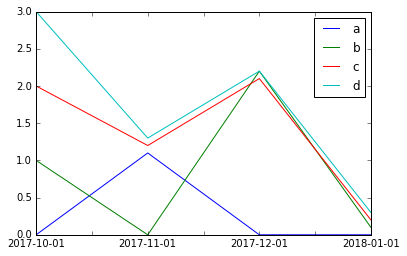

In [186]:
import matplotlib.pyplot as plt
df6.plot()
plt.show()

Obtener el histograma de cada serie

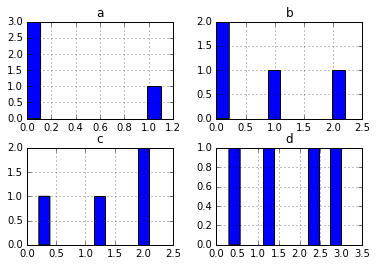

In [191]:
df6.hist()
plt.show()

## Referencias

DataFrame
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
